In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import  set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

到这里我们导入了需要的所有资源

In [6]:
import seaborn as sns

这里是我们运行编辑时添加的

In [8]:
# 假设你的代码文件（.ipynb 或 .py）和 house_data.csv 都在 Bostun_house 文件夹下
# 直接用文件名读取（同一目录下的相对路径）
data = pd.read_csv('house_data.csv')

In [9]:
def testHouse():
    # 读取房屋数据集
    data = pd.read_csv("house_data.csv")
    # 通过 head 方法查看数据集的前几行数据
    #pd.set_option('display.column_space', 120)
    # print(data.head())

    # 数据维度
    print(data.shape)

    # 特征属性的字段类型
    # print(data.dtypes)

    # 检查有没有数据中有没有空值
    print(data.isnull().any().sum())

    # 描述性统计信息
    pd.set_option('display.precision', 1)
    print(data.describe())

    # 提取特征和标记
    prices = data['MEDV']
    features = data.drop('MEDV', axis=1)

    # 关联关系
    pd.set_option('display.precision', 2)
    print(data.corr(method='pearson'))

    # 直方图
    data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
    plt.show()

    # 密度图
    data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, fontsize=1)
    plt.show()

    # 箱线图
    data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, fontsize=8)
    plt.show()

    # 查看各个特征的散点分布
    pd.plotting.scatter_matrix(data, alpha=0.7, figsize=(10, 10), diagonal='kde')
    plt.show()

    # Heatmap
    # 计算相关性矩阵
    corr = data.corr()

    # 画热力图
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()
    


(506, 14)
0
          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11

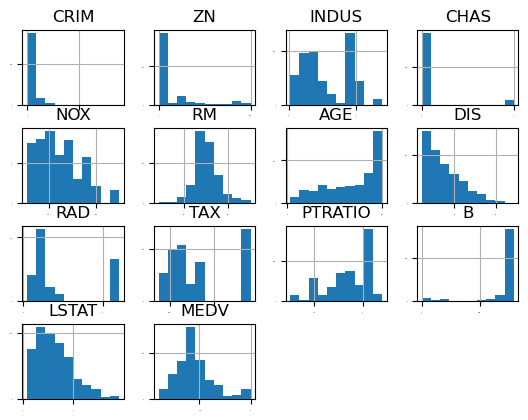

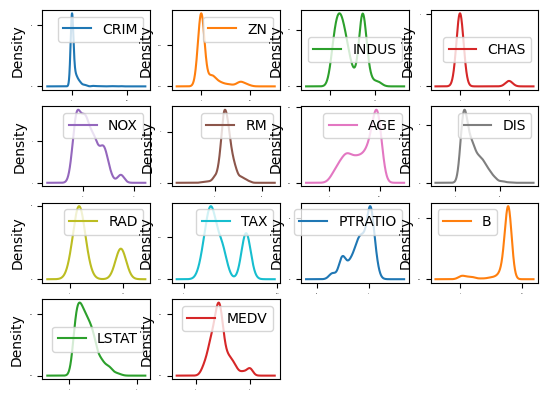

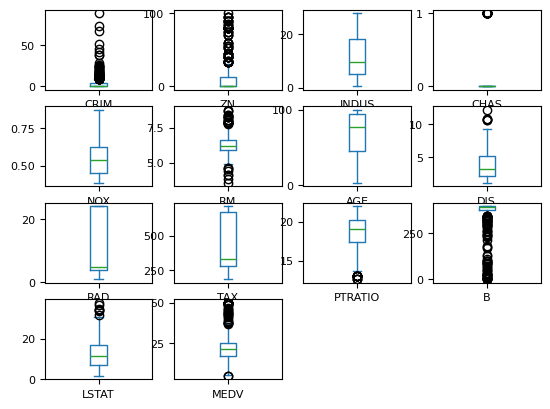

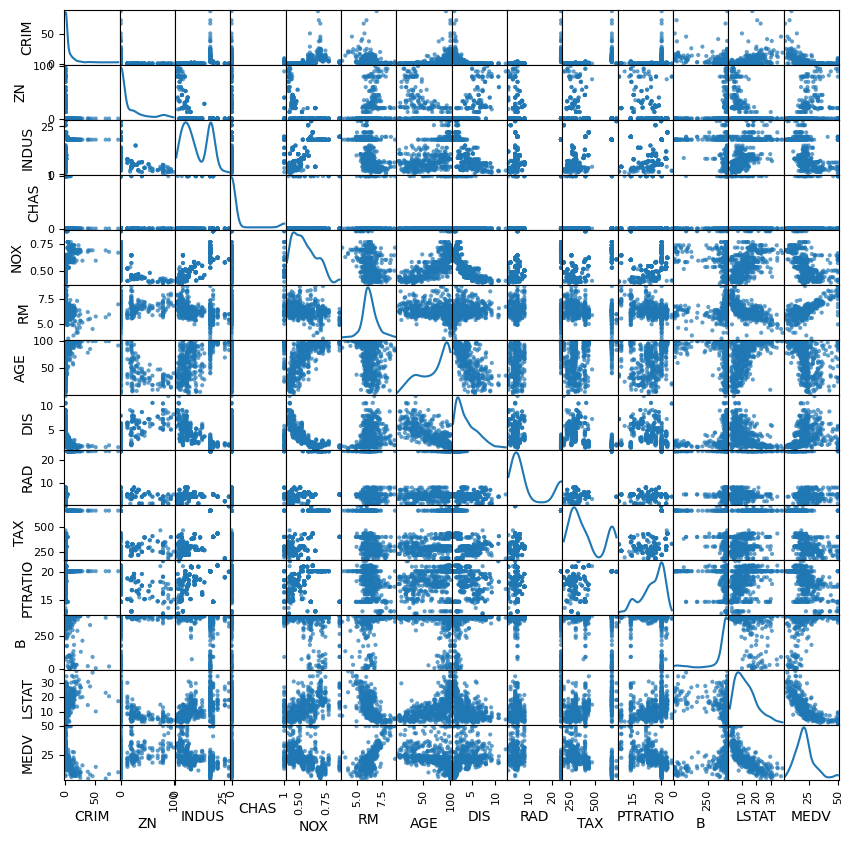

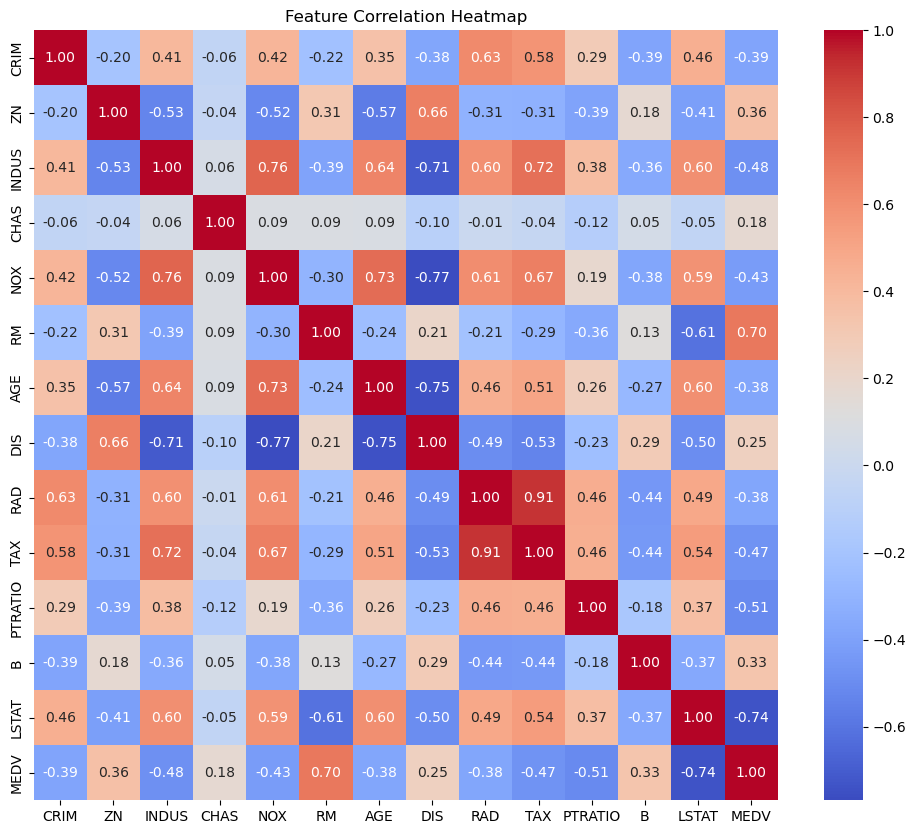

In [10]:
# 调用函数，执行所有绘图逻辑
testHouse()

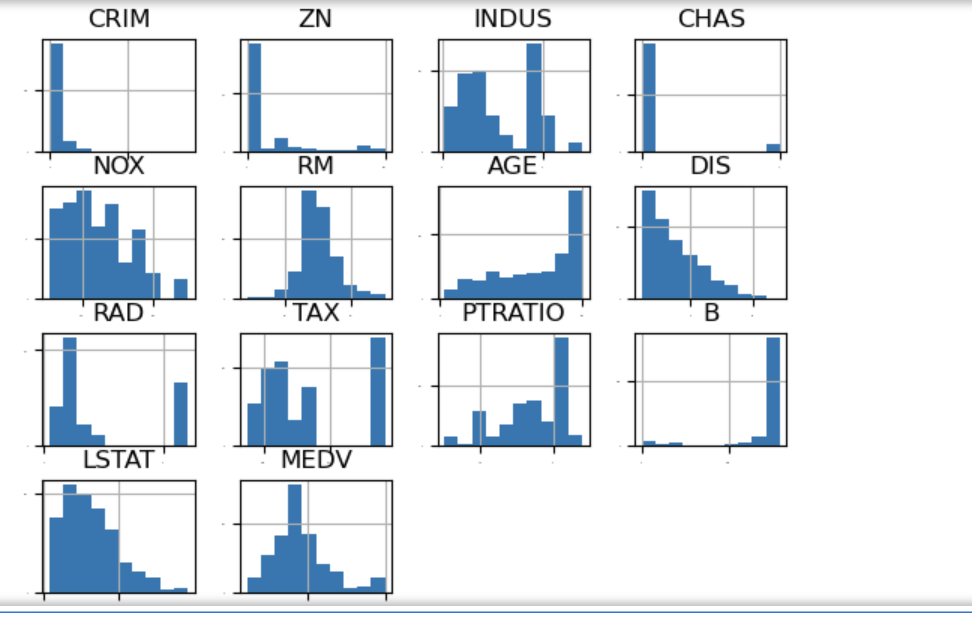
对直方图（密度图可同理）的说明：
### 1. CRIM（城镇人均犯罪率）
图形高度集中在左侧较低值区域，呈现右偏态分布，说明大部分城镇人均犯罪率较低，只有少数城镇犯罪率较高。

### 2. ZN（超过25,000平方英尺的住宅用地比例）
主要集中在左侧，大部分区域该比例较低，在右侧有少量分布，表明只有少数区域有较大比例的大面积住宅用地。

### 3. INDUS（城镇非零售商业用地比例）
分布相对分散，有多个峰值，说明不同城镇的非零售商业用地占比情况多样，没有明显的集中趋势。
 
### 4. CHAS（查尔斯河虚拟变量，1表示边界是河，0表示不是）
几乎是单峰分布，且大部分值为0，说明大多数区域不与查尔斯河接壤，只有少数区域接壤。

### 5. NOX（一氧化氮浓度）
分布较为均匀，在一定范围内都有数据分布，表明不同区域一氧化氮浓度有一定差异，但没有极端的集中或分散情况。

### 6. RM（平均房间数）
近似正态分布，中间区域（6 - 7 之间）数据集中，说明大部分房屋的平均房间数集中在这个范围，房间数过多或过少的情况相对较少。

### 7. AGE（1940年以前建造的自住房屋比例）
呈右偏态分布，大量数据集中在左侧，说明多数区域1940年前建造的自住房屋比例较高，比例较低的区域较少。

### 8. DIS（到波士顿5个就业中心的加权距离）
分布向右倾斜，大部分区域到就业中心的加权距离较短，距离较远的区域相对较少。

### 9. RAD（辐射状公路的可达性指数）
分布较为分散，在不同数值上都有分布，反映出各区域在辐射状公路可达性方面差异较大。

### 10. TAX（每10,000美元的全值财产税率）
分布有一定集中趋势，多数区域税率集中在某些值附近，税率过高或过低的区域相对较少。

### 11. PTRATIO（城镇师生比例）
有一定的集中趋势，大部分区域师生比例集中在某个范围，但也有一定的分散性，表明不同区域师生比例存在差异。

### 12. B（1000(Bk - 0.63)^2，其中Bk是城镇中黑人的比例）
分布集中在左侧，大部分区域B值较小，说明多数区域黑人比例相关计算值处于较低水平。

### 13. LSTAT（低收入阶层比例）
右偏态分布，多数区域低收入阶层比例较低，比例较高的区域较少。

### 14. MEDV（自住房屋房价中位数）
近似正态分布，房价中位数集中在一定范围，过高或过低房价的房屋相对较少。 
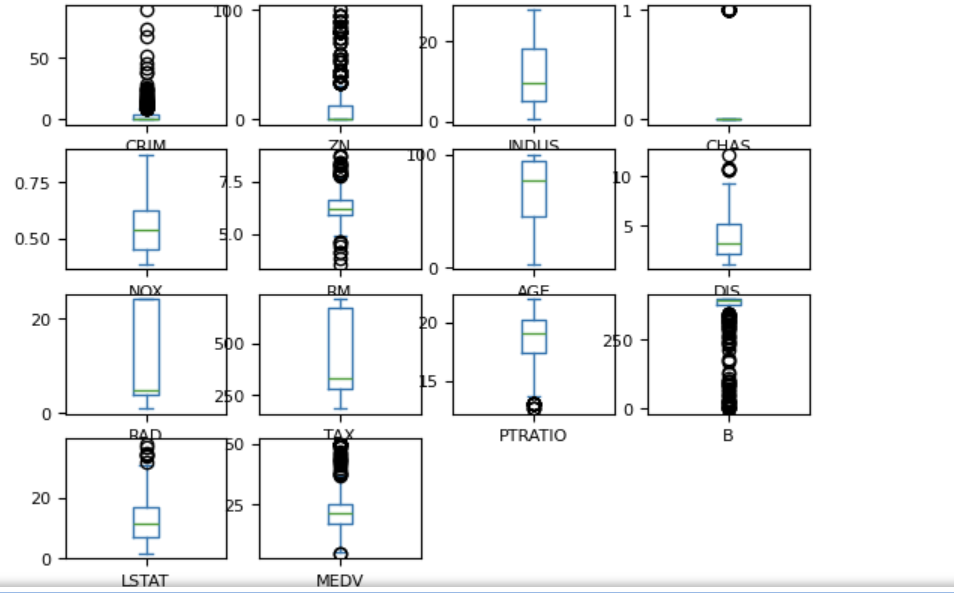
这是对波士顿房价数据集中“ZN”特征（超过25,000平方英尺的住宅用地比例）的详细解释：
- **箱体**：箱体中间的横线是中位数，代表数据的中间值。箱体的上下边界分别是第一四分位数（Q1，即25%分位数）和第三四分位数（Q3，即75%分位数）。这意味着约50%的数据落在这个箱体内。从图中可看出，ZN数据的中位数较低，且箱体较短，说明大部分区域该比例数值相对集中在较小的范围内。
- **须**：箱体上下两端的竖线为须。须的末端通常表示数据的正常范围边界，一般是Q1 - 1.5IQR（IQR = Q3 - Q1，即四分位距）和Q3 + 1.5IQR。超出这个范围的点被视为异常值。
- **异常值**：图中箱体上方的黑色圆圈为异常值，表示这些区域的超过25,000平方英尺的住宅用地比例明显高于正常范围。 

总体来说，ZN特征的箱线图显示大部分区域超过25,000平方英尺的住宅用地比例较低且较为集中，同时存在一些比例较高的异常区域。 

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')


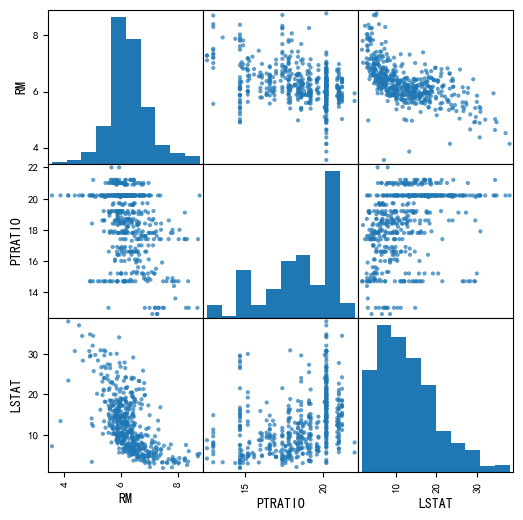

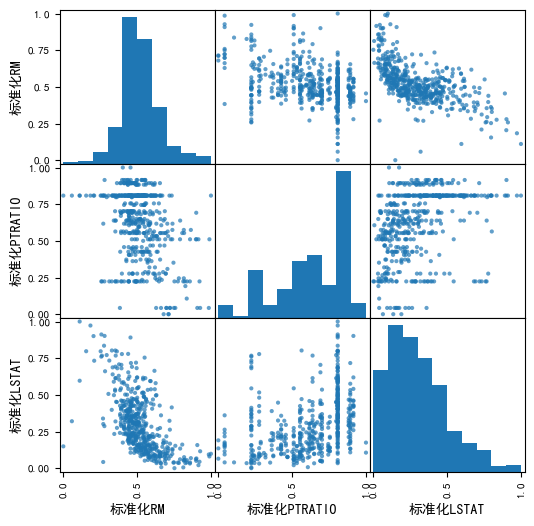

[0.73889935 0.75541763 0.43310352 0.6044451  0.79360853]
0.6650948277379685


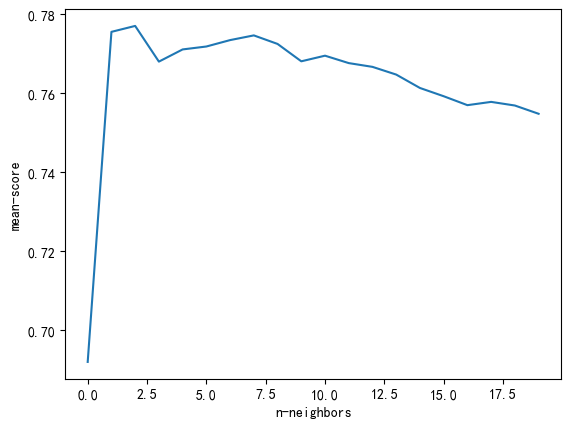

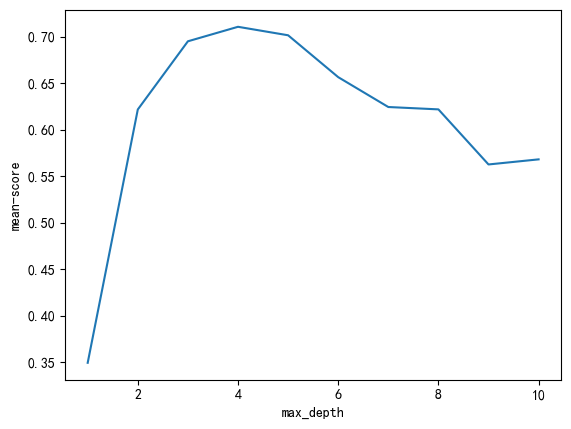

     lr  linear_svr  poly_svr  rbf_svr   knn   dtr
0  0.74        0.63      0.87     0.76  0.81  0.79
1  0.76        0.62      0.87     0.77  0.89  0.87
2  0.43        0.39      0.57     0.53  0.59  0.55
3  0.60        0.55      0.72     0.74  0.73  0.52
4  0.79        0.61      0.81     0.74  0.86  0.82


In [19]:
def featureSelection():
    data = pd.read_csv("house_data.csv")
    x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
              'PTRATIO', 'B', 'LSTAT']]
    # print(x.head())
    y = data['MEDV']
    # 选择三个关键特征
    from sklearn.feature_selection import SelectKBest
    SelectKBest = SelectKBest(f_regression, k=3)
    bestFeature = SelectKBest.fit_transform(x, y)
    SelectKBest.get_support(indices=False)

    # 提取选择的特征
    # print(SelectKBest.transform(x))
    print(x.columns[SelectKBest.get_support(indices=False)])

    features = data[['RM', 'PTRATIO', 'LSTAT']].copy()
    # 绘制这贴特征的散点图
    pd.plotting.scatter_matrix(features, alpha=0.7, figsize=(6, 6), diagonal='hist')
    pyplot.show()

    # 数据标准化处理，将特征值缩放到[0,1]区间，添加新列
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    for feature in features.columns:
        features.loc[:, '标准化' + feature] = scaler.fit_transform(features[[feature]])

    # 散点可视化，查看特征归一化后的数据
    font = {
        'family': 'SimHei'
    }
    pyplot.rc('font', **font)
    pd.plotting.scatter_matrix(features[['标准化RM', '标准化PTRATIO', '标准化LSTAT']], alpha=0.7, figsize=(6, 6),diagonal='hist')
    pyplot.show()

    #数据集拆分
    x_train, x_test, y_train, y_test = train_test_split(features[['标准化RM', '标准化PTRATIO', '标准化LSTAT']], y,
                                                        test_size=0.3, random_state=33)
    #random_state 表示是否随机划分训练集与测试集，若ransom_state=0，则会随机划分测试集与训练集。随机划分的结果就是会使每次训练的分数不同，程序每运行一次，训练分数就会变化。
    #若使random_state =1(或其他非零数)，则无论程序运行多少次，分数都是相同的。

    
    # 1.lr 线性回归LinearRegression模型进行交叉验证（避免过拟合）
    # 认为特征和结果之间是 "直线关系"，像用公式算结果
    import warnings
    warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd") #过滤告警

    lr = LinearRegression()
    lr_predict = cross_val_predict(lr, x_train, y_train, cv=5)
    lr_score = cross_val_score(lr, x_train, y_train, cv=5)
    lr_meanscore = lr_score.mean()
    print(lr_score)
    print(lr_meanscore)

    
    #2.SVR  支持向量回归 Support Vector Regression，是支持向量机（SVM）在回归问题上的应用，通过寻找一个最优超平面来拟合数据
    # 在数据中找一条 "路"，让大多数数据点都在路中间，路越宽越好（允许少量点在路边）
    from sklearn.svm import SVR
    # 线性核函数
    linear_svr = SVR(kernel = 'linear')
    linear_svr_predict = cross_val_predict(linear_svr, x_train, y_train, cv=5)
    linear_svr_score = cross_val_score(linear_svr, x_train, y_train, cv=5)
    linear_svr_meanscore = linear_svr_score.mean()

    # 多项式核函数
    poly_svr = SVR(kernel = 'poly')
    poly_svr_predict = cross_val_predict(poly_svr, x_train, y_train, cv=5)
    poly_svr_score = cross_val_score(poly_svr, x_train, y_train, cv=5)
    poly_svr_meanscore = poly_svr_score.mean()

    #径向基函数核函数
    rbf_svr = SVR(kernel = 'rbf')
    rbf_svr_predict = cross_val_predict(rbf_svr, x_train, y_train, cv=5)
    rbf_svr_score = cross_val_score(rbf_svr, x_train, y_train, cv=5)
    rbf_svr_meanscore = rbf_svr_score.mean()

    
    #3.knn K近邻回归，KNeighborsRegressor（K 近邻回归器），循环是在超参数K寻优，防止欠拟合或者过拟合
    # 看 "邻居" 的情况来猜结果，像生活中 "参考周边相似案例"
    from sklearn.neighbors import KNeighborsRegressor
    score = []
    for n_neighbors in range(1, 21):
        knn = KNeighborsRegressor(n_neighbors, weights='uniform')
        knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
        knn_score = cross_val_score(knn, x_train, y_train, cv=5)
        knn_meanscore = knn_score.mean()
        score.append(knn_meanscore)
    plt.plot(score)
    plt.xlabel('n-neighbors')
    plt.ylabel('mean-score')
    plt.show()


    
    #4.Decision Tree 优化决策树回归模型的超参数，寻找最优树深度，防止欠拟合或者过拟合
    # 不断提问的裁判"，通过一步步提问缩小范围，最终得出结论，非常贴近人类的决策思维
    from sklearn.tree import DecisionTreeRegressor
    score=[]
    for n in range(1,11):
        dtr = DecisionTreeRegressor(max_depth = n)
        dtr_predict = cross_val_predict(dtr, x_train, y_train, cv=5)
        dtr_score = cross_val_score(dtr, x_train, y_train, cv=5)
        dtr_meanscore = dtr_score.mean()
        score.append(dtr_meanscore)
    plt.plot(np.linspace(1,10,10), score)
    plt.xlabel('max_depth')
    plt.ylabel('mean-score')
    plt.show()

    
    # knn模型，使用之前的参数寻优确定的中最优邻居树，进行5折交叉验证
    knn = KNeighborsRegressor(2, weights='uniform')
    knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
    knn_score = cross_val_score(knn, x_train, y_train, cv=5)
    knn_meanscore = knn_score.mean()

    # 决策树模型，使用优化得到的最佳树深度，进行5折交叉验证
    dtr = DecisionTreeRegressor(max_depth=4)
    dtr_predict = cross_val_predict(dtr, x_train, y_train, cv=5)
    dtr_score = cross_val_score(dtr, x_train, y_train, cv=5)
    dtr_meanscore = dtr_score.mean()

    # 创建一个字典evaluating，收集了所有模型（线性回归、3 种 SVR、KNN、决策树）的交叉验证得分
    evaluating = {
        'lr': lr_score,
        'linear_svr': linear_svr_score,
        'poly_svr': poly_svr_score,
        'rbf_svr': rbf_svr_score,
        'knn': knn_score,
        'dtr': dtr_score
    }
    # 得到一个表格，直观比较不同模型的平均性能，为最终选择哪个模型提供依据
    evaluating = pd.DataFrame(evaluating)
    print(evaluating)




def main():
    # testHouse()
    featureSelection()




if __name__ == "__main__":
    main()

到此，我们已经对数据完全处理之后用不同模型模拟并进行了评估，对各模型的模拟能力给出了打分
这是各个模型的评估情况：
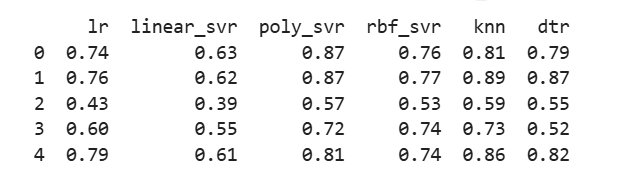